Constrói o gráfico da distribuição a priori Beta

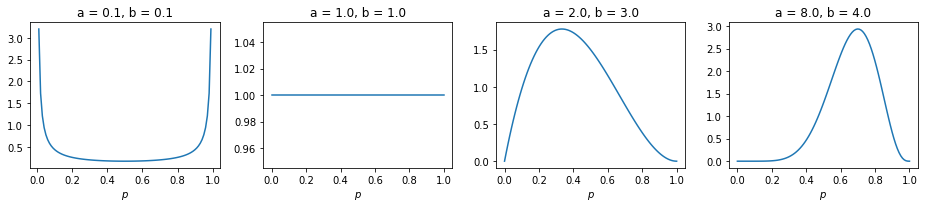

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from scipy.stats import beta

# Conjuntos de parâmetros da priori para teste
a_b_params = ((0.1, 0.1), (1, 1), (2, 3), (8, 4))
p = np.linspace(0, 1, 100)

# Plota as densidades da Beta para cada conjunto de parâmetros
plt.figure(figsize=(13,3))
for i, (a, b) in enumerate(a_b_params):
    plt.subplot(1, len(a_b_params), i+1)

    prior = beta(a, b)

    plt.plot(p, prior.pdf(p))    
    plt.xlabel(r'$p$')
    plt.title("a = {:.1f}, b = {:.1f}".format(a, b))
    plt.tight_layout()


Para o exemplo do Sildenafil, constrói o gráfico com a verossimilhança, a priori (conjugada) assumida e a posteriori.

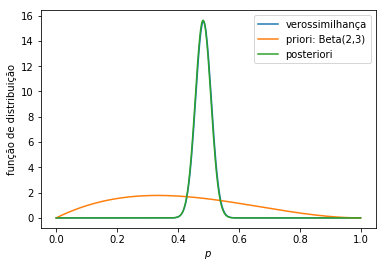

In [41]:
# Eixo x entre 0 e 1 de .002 em .002.
x_axis = np.arange(0, 1, 0.002)
dp = np.sqrt(0.483*(1-0.483)/379)
a = 2
b = 3
prior = beta(a,b)
posteriori = beta(183+a,379-183+b)
 
# Média = 0.483, desvio Padrão = dp, apenas para ilustar
plt.plot(x_axis, norm.pdf(x_axis,0.483,dp), label="verossimilhança")
plt.plot(x_axis, prior.pdf(x_axis),label="priori: Beta(2,3)")
plt.plot(x_axis, posteriori.pdf(x_axis),label="posteriori")
plt.xlabel("$p$")
plt.ylabel("função de distribuição")
plt.legend()
plt.show();

Exemplo do intervalo de credibilidade

No handles with labels found to put in legend.


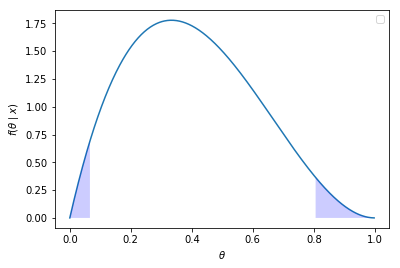

In [58]:
import matplotlib.colors as clrs

# Eixo x entre 0 e 1 de .002 em .002.
x_axis = np.arange(0,1, 0.002)

# Define qual é a posteriori
posteriori = beta(2,3)
y_axis = posteriori.pdf(x_axis)

# Constrói o gráfico da posteriori, representando 
plt.plot(x_axis, y_axis)
plt.fill_between(x_axis[x_axis <= beta.ppf(.025, 2,3)], y_axis[x_axis <= beta.ppf(.025, 2,3)], 
                 facecolor = clrs.to_rgba(c = (0, 0, 1, 0.2)), zorder = 10)
plt.fill_between(x_axis[x_axis >= beta.ppf(.975, 2,3)], y_axis[x_axis >= beta.ppf(.975, 2,3)], 
                 facecolor = clrs.to_rgba(c = (0, 0, 1, 0.2)), zorder = 10)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$f(\theta \mid x)$')
plt.legend()
plt.show();